<br />

<div style="text-align: center;">
<font size="7">数値計算試験問題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">2021/12/17 実施</font>
<br />
<font size="4">2022/12/16 予行演習実施</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2021-2 </font>
</div>

2022/12/16 予行演習:以下の問いに答えよ．答案はpdfとipynb形式でLUNAのd12へ全員が個別に提出せよ．pdfは2pageを一枚に集約して作成すること．


# 1 簡単な行列計算(25点)
次のデータにフィットした二次関数を求める．
``` python
import numpy as np

xdata = np.array([1,2,3,4])
ydata = np.array([1,2,5,11])
```

最小二乗法の正規方程式(normal equations)から求められるデザイン行列$A$は，
$$
A=\left( \begin {array}{ccc}  1. &  1. &   1.\\
 1. & 2. &  4. \\
 1. & 3. & 9. \\
 1. & 4. & 16.
\end {array} \right)
$$
となる．$A^TA$の逆行列から

$$
a = (A^TA)^{-1} A^T y
$$
により最適パラメータ$a$を求め，データと同時に plot せよ.

/Users/bob/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]
[ 2.75 -2.95  1.25]


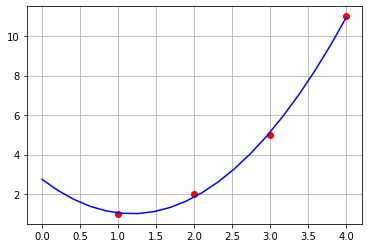

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.linalg as linalg

xdata=np.array([1,2,3,4])
ydata=np.array([1,2,5,11])

def f(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

def ff(x,i):
    return x**i

Av = np.zeros([4,3])
for i in range(0,3):
    for j in range(0,4):
        Av[j][i]=ff(xdata[j],i)


print(Av)
Ai = linalg.inv(np.dot(np.transpose(Av),Av))
b = np.dot(np.transpose(Av),ydata)
params = np.dot(Ai,b)
print(params)
plt.plot(xdata,ydata, 'o', color='r')

x =np.linspace(0,4,20)
y = f(x,params[0],params[1],params[2])
plt.plot(x,y, color='b')

plt.grid()
plt.show()

# 2 ニュートンの差分商補間(25点)

2を底とする対数関数($\log[2](x)$)の$x=2$における値$F(2.0)$をニュートンの差分商補間を用いて求める．
ニュートンの内挿公式は，
$$
\begin{array}{rc}
F (x )&=F (x _{0})+
(x -x _{0})f _{1}\lfloor x_0,x_1\rfloor+
(x -x _{0})(x -x _{1})
f _{2}\lfloor x_0,x_1,x_2\rfloor + \\
& \cdots +  \prod_{i=0}^{n-1} (x-x_i) \, 
f_n \lfloor x_0,x_1,\cdots,x_n \rfloor
\end{array}
$$
である．ここで$f_i \lfloor\, \rfloor$ は次のような関数を意味していて，
$$
\begin{array}{rc}
f _{1}\lfloor x_0,x_1\rfloor &=&  \frac{y_1-y_0}{x_1-x_0} \\
f _{2}\lfloor x_0,x_1,x_2\rfloor &=&  \frac{f _{1}\lfloor x_1,x_2\rfloor-
f _{1}\lfloor x_0,x_1\rfloor}{x_2-x_0} \\
\vdots & \\
f _{n}\lfloor x_0,x_1,\cdots,x_n\rfloor &=&  \frac{f_{n-1}\lfloor x_1,x_2\cdots,x_{n}\rfloor-
f _{n-1}\lfloor x_0,x_1,\cdots,x_{n-1}\rfloor}{x_n-x_0} 
\end{array}
$$
差分商と呼ばれる．$x_k=1.4, 1.8, 2.2, 2.6$をそれぞれ選ぶと，差分商補間のそれぞれの項は以下の通りとなる．

$$
\begin{array}{ccl|lll}
\hline
k  &  x_k & y_k=F_0( x_k) &f_1\lfloor x_k,x_{k+1}\rfloor & f_2\lfloor x_k,x_{k+1},x_{k+2}\rfloor &  f_3\lfloor x_k,x_{k+1},x_{k+2},x_{k+3}\rfloor \\
\hline
0  &   1.4  &  0.4854268272  &          &              &\\
&      &     &     0.906425198     &              &\\ 
1  &   1.8  &  0.8479969066  &           &    [ XXX ]     &\\
&      &     &     0.723766544     &              & 0.0639712067 \\
2  &  2.2  &  1.137503524  &           &      -0.1515578700     &\\ 
&      &     &     0.602520248    &              &\\ 
3  &  2.6  &  1.378511623 &           &              &\\ 
\hline
\end{array}
$$
それぞれの項は，例えば，

$$
f_1\lfloor x_0,x_1 \rfloor =\frac{0.8479969066 - 0.4854268272}{1.8-1.4}=0.906425198
$$
で求められる．ニュートンの差分商の一次多項式の値はx=2.0で

\begin{align}
F(x)&=F_0(1.4)+(x-x_0)f_1\lfloor x_0,x_1\rfloor  \\
& =0.4854268272+(2.0-1.4)\times0.906425198\\
& =1.029281946
\end{align}
となる．

## (1) 差分商補間の表中の開いている箇所[ XXX ]を埋めよ．
## (2)  ニュートンの二次多項式

$$
F (x )=F (x _{0})+(x -x _{0})f _{1}\lfloor x_0,x_1\rfloor+(x -x _{0})(x -x _{1})
f _{2}\lfloor x_0,x_1,x_2\rfloor
$$
の値を求めよ．
## (3) ニュートンの三次多項式の値を求めよ．
(E.クライツィグ著「数値解析」(培風館,2003), p.31, 例4改)

In [2]:
print('(1)')
print((0.723766544 - 0.906425198)/(2.2-1.4))
print('(2)')
print(0.4854268272+(2.0-1.4)*0.906425198)
print(0.4854268272+(2.0-1.4)*0.906425198+(2-1.4)*(2-1.8)*(-0.2283233180))
print('(3)')
print(0.4854268272+(2.0-1.4)*0.906425198+(2-1.4)*(2-1.8)*(-0.2283233180)+(2-1.4)*(2-1.8)*(2-2.2)*0.0639712067)


(1)
-0.22832331749999996
(2)
1.029281946
1.00188314784
(3)
1.0003478388792002


# 3 数値積分(25点)
$$
\int_1^2 \frac{1}{x} dx　= \log2
$$
の近似値をシンプソンの公式で求めよ．区間を2,4,8,16等分して片対数プロットで収束の様子を示せ．
ただし$\log_{e}(2)=0.6931471805599453$である．

「大学教養数学」，児玉鹿三,技研社 1963, p.172.

In [3]:
import numpy as np
print(np.log(2))

0.6931471805599453


In [4]:
def func(x):
    return 1.0/x

def simpson(N):
    x0, xn =1.0, 2.0

    M = int(N/2)
    h = (xn-x0)/N
    Seven, Sodd = 0.0, 0.0
    for i in range(1, 2*M, 2): #rangeの終わりに注意
        xi = x0 + i*h
        Sodd += func(xi)
#        print("{0}".format(i))
    for i in range(2, 2*M, 2):
        xi = x0 + i*h
        Seven += func(xi)
#        print("{0}".format(i))

    return h*(func(x0)+4*Sodd+2*Seven+func(xn))/3

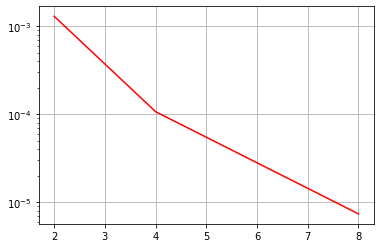

In [5]:
x, y = [], []
for i in range(1,4):
    x.append(2**i)
    y.append(abs(simpson(2**i)-0.6931471805599453))
plt.plot(x, y, color = 'r')
plt.yscale('log')
plt.grid()
plt.show()

# 4 スムースな静止(25点)

バネと質点(mass)の運動において，地面から摩擦力(friction)が速度(velocity)に比例して働いているとする．
以下のコードに「速度に比例する時間に依存しない一定の摩擦項」を加えると，質点が減衰(damping)する様子が図の通り再現される．
1. friction=0.1でこの図を作成せよ．
1. さらに，質点が原点を超えることなくできるだけ早く減衰するにはfrictionはどの程度の値が最適か．
小数点以下一桁程度で答えよ（厳密に導かなくていいよ）．
1. 摩擦力と質点の振る舞いを定性的に解説せよ．

これは，ロボットアームなどの静止をダンパー制御するときの振る舞いとなる．

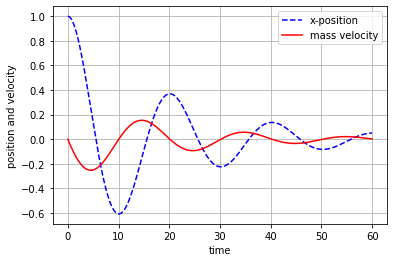

``` python
import matplotlib.pyplot as plt

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b', linestyle='--',label="x-position")
    plt.plot(tt, vv, color = 'r', label="mass velocity")
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('position and velocity')
    plt.grid()
    plt.show()
def euler3(x0,v0):
  v1 = v0 +(- k * x0 ) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]

friction = 0.1
t, dt, k=0.0, 0.01, 0.1
tt,xx,vv=[0.0],[1.0],[0.0]
for i in range(0,6000):
  t += dt
  x, v = euler3(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)
```

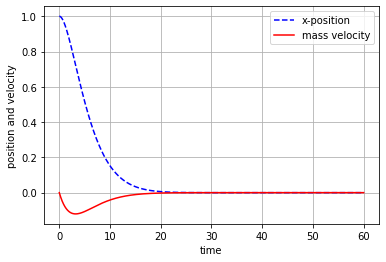

In [6]:
import matplotlib.pyplot as plt

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b', linestyle='--',label="x-position")
    plt.plot(tt, vv, color = 'r', label="mass velocity")
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('position and velocity')
    plt.grid()
    plt.show()
def euler3(x0,v0):
  v1 = v0 +(- k * x0 - friction*v0) * dt
  x1 = x0 + v0 * dt
  return [x1, v1]

friction = 0.6
t, dt, k=0.0, 0.01, 0.1
tt,xx,vv=[0.0],[1.0],[0.0]
for i in range(0,6000):
  t += dt
  x, v = euler3(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

my_plot(xx, vv, tt)